In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [44]:
img = cv2.imread('../DATA/pennies.jpg')
sep_coins = cv2.imread('../DATA/pennies.jpg')

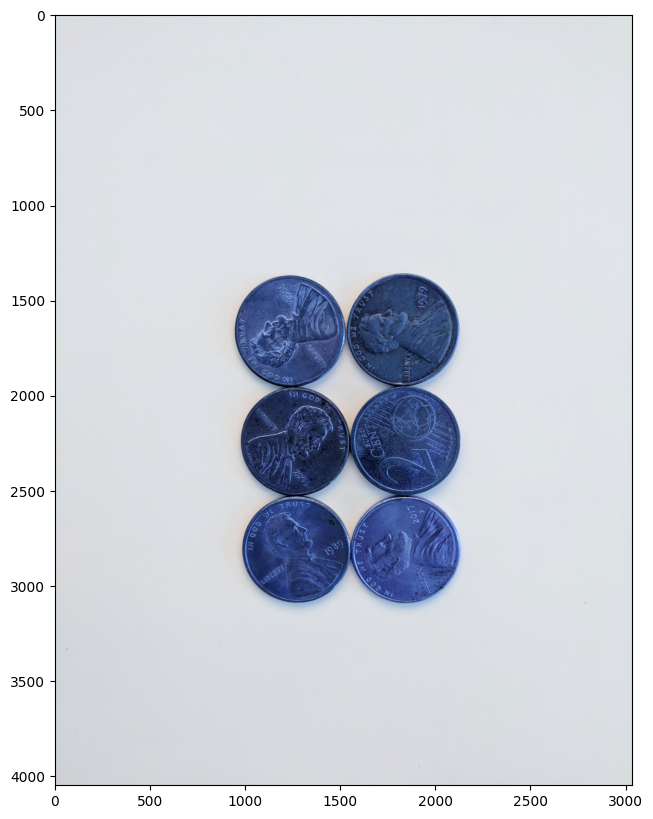

In [8]:
display(img)

In [9]:
img = cv2.medianBlur(img,35)

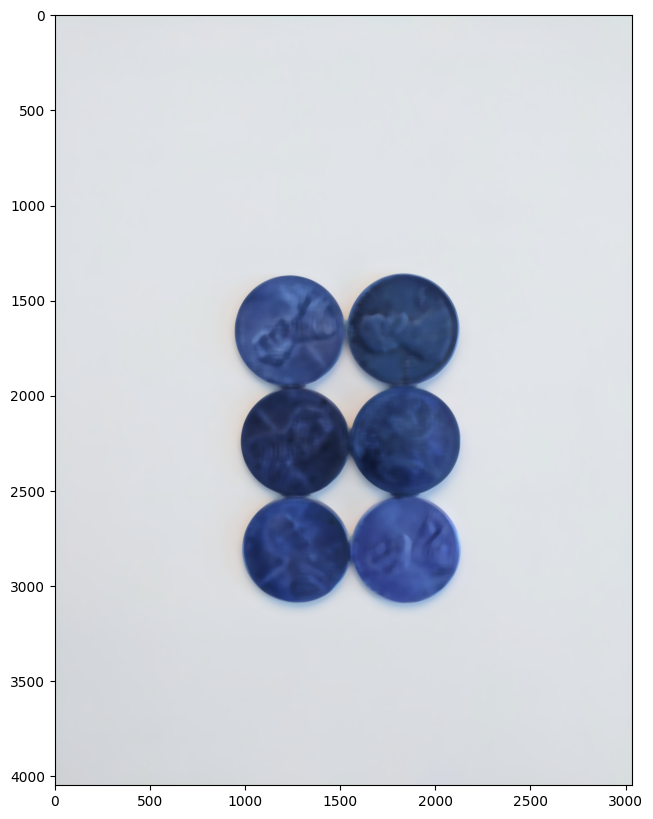

In [10]:
display(img)

In [11]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [13]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

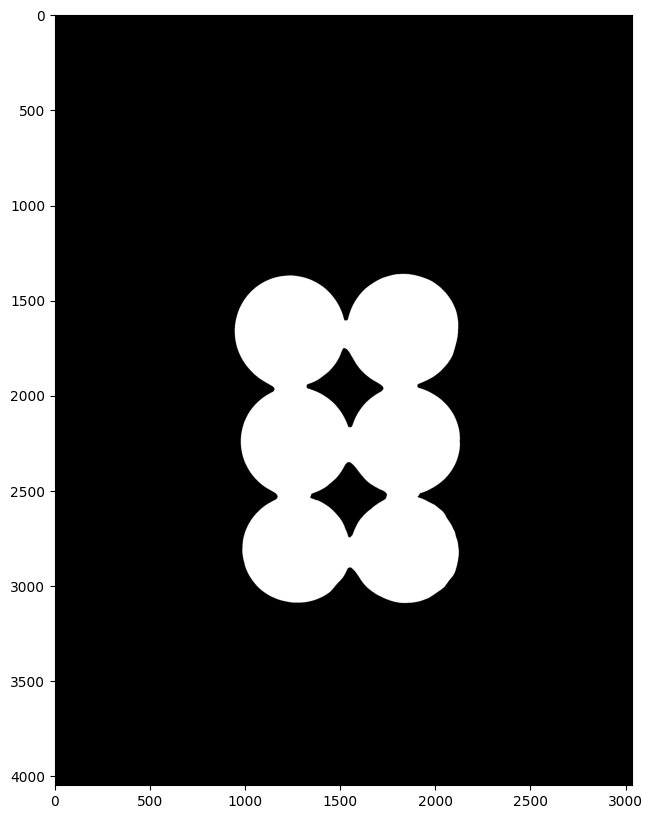

In [14]:
display(thresh)

In [15]:
#noise removal ((중요)보이지 않는 노이즈를 없애줌)

In [16]:
kernel = np.ones((3,3),np.uint8)

In [18]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

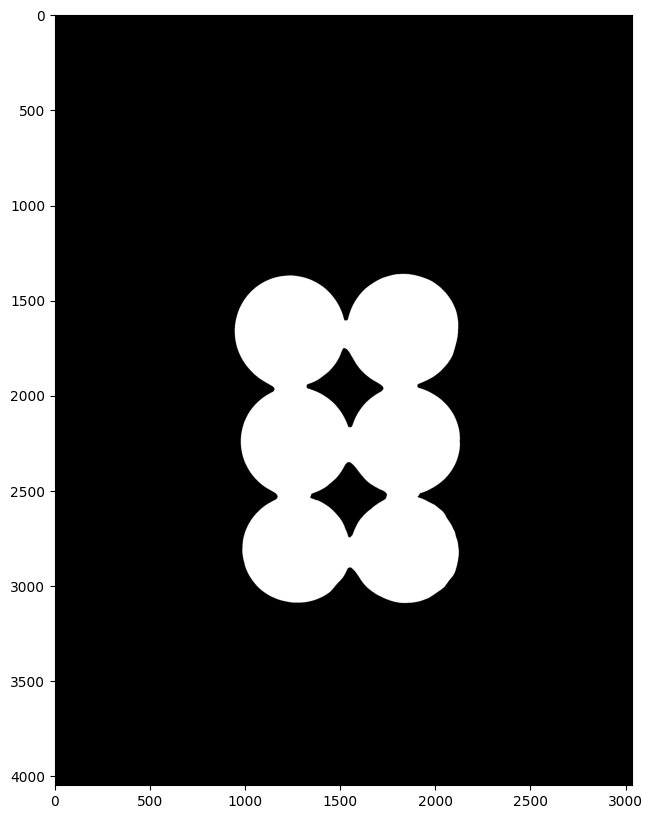

In [19]:
display(opening)

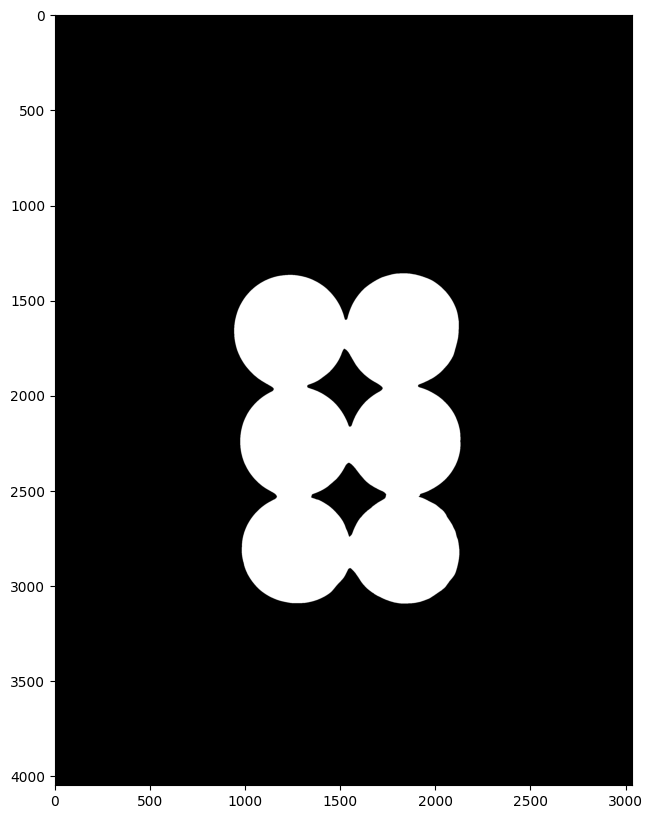

In [27]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display(sure_bg,cmap='gray')

In [20]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

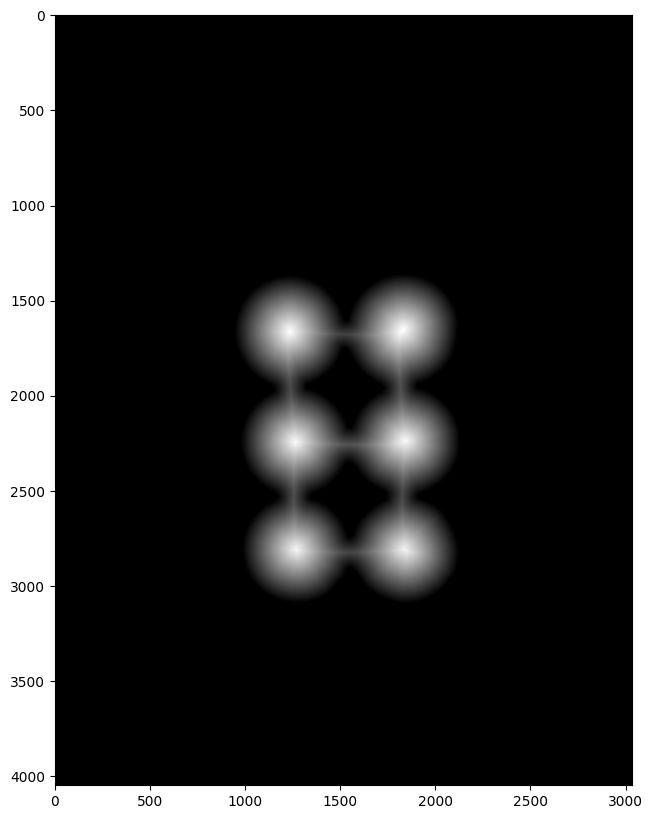

In [21]:
display(dist_transform)

In [23]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

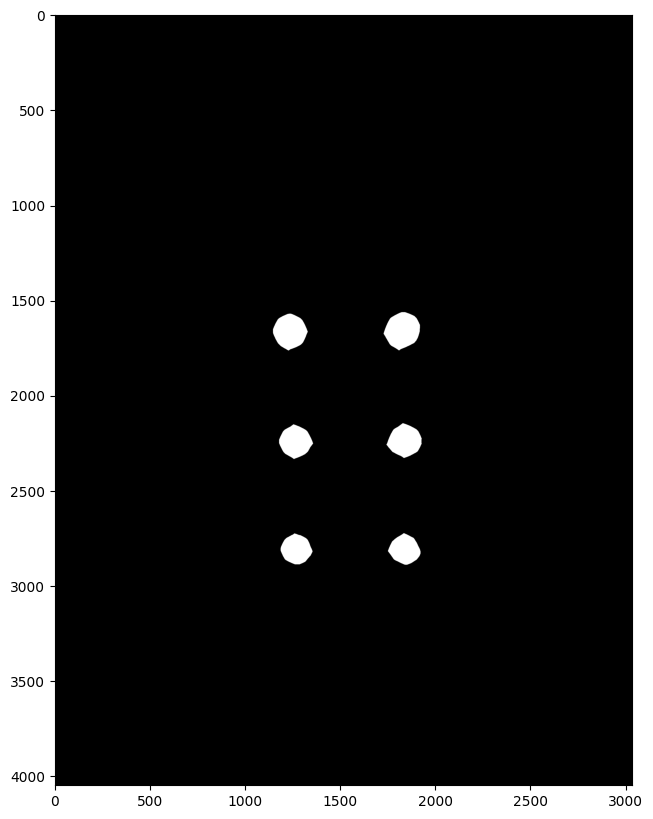

In [24]:
display(sure_fg)

In [25]:
sure_fg = np.uint8(sure_fg)

In [28]:
unknown = cv2.subtract(sure_bg,sure_fg)

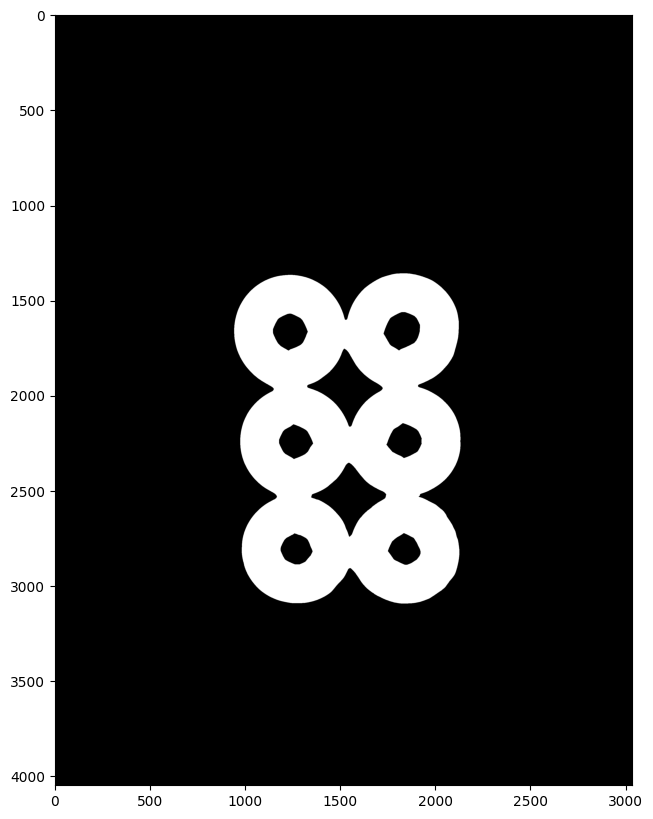

In [29]:
display(unknown)

In [30]:
ret,markers = cv2.connectedComponents(sure_fg)

In [33]:
markers = markers + 1

In [35]:
markers[unknown==255] = 0

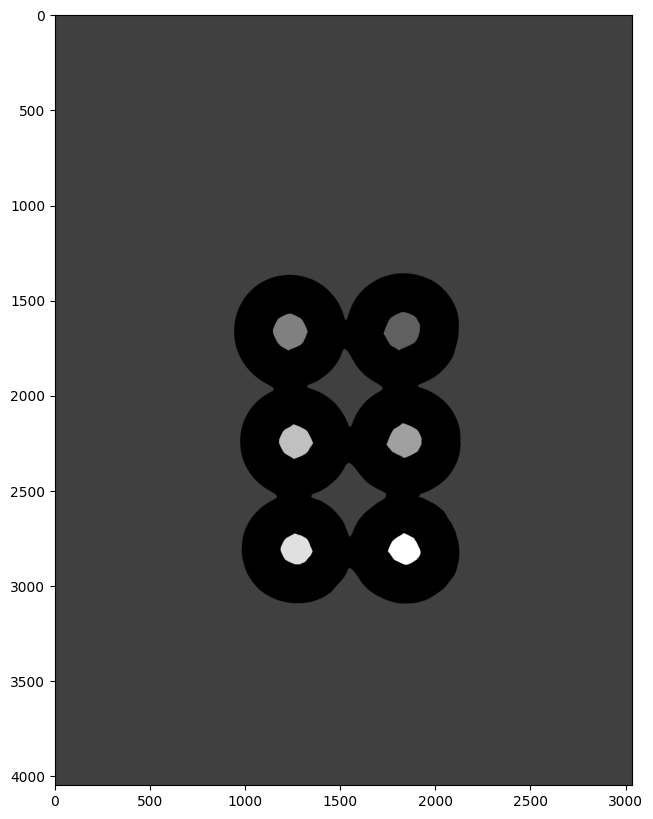

In [37]:
display(markers)

In [38]:
markers = cv2.watershed(img,markers)

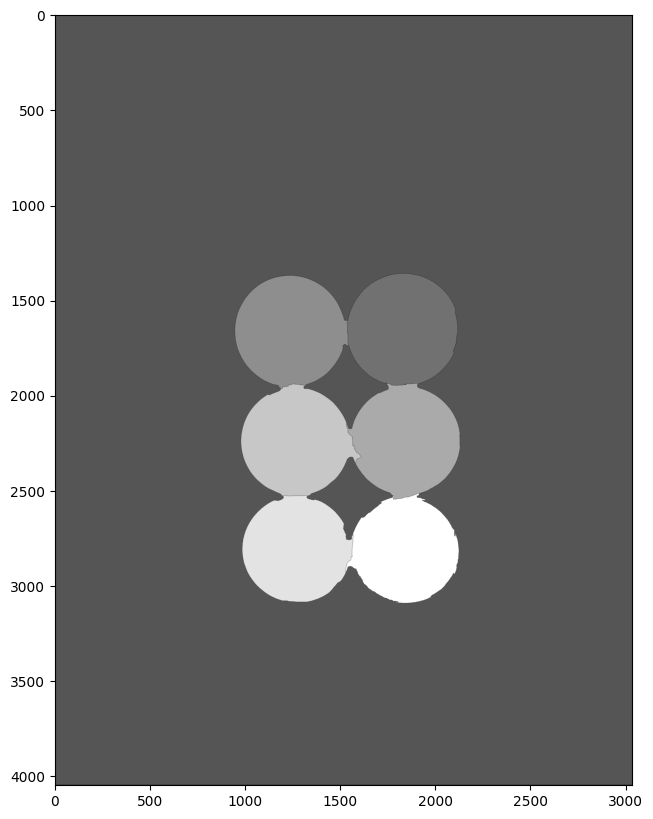

In [39]:
display(markers)

In [47]:
contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

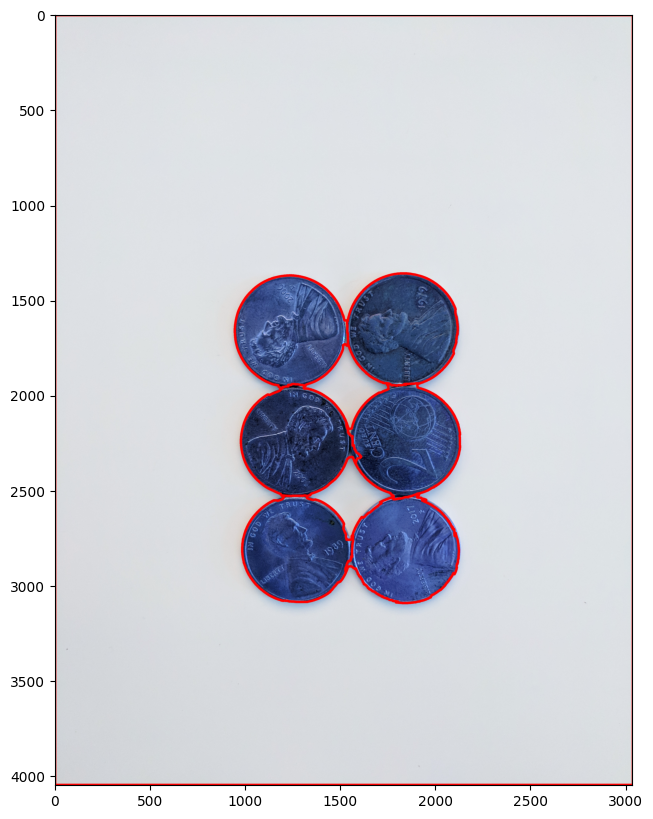

In [48]:
display(sep_coins)